In [1]:
import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("btc_returns.csv", parse_dates=[0])

In [3]:
df.head()

,Date,Returns,0:00,1:00,2:00,3:00,4:00,5:00,6:00,7:00,...,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00
0,2015-10-10,0.91,-0.35,0.00,0.00,0.00,0.00,0.0,0.00,0.0,...,0.0,0.00,0.00,-0.30,0.00,0.36,5.91,-4.58,0.00,0.00
1,2015-10-11,3.20,0.00,0.15,-0.03,0.00,-0.06,0.0,0.00,0.0,...,0.0,0.19,0.00,0.00,0.00,0.00,0.00,0.38,0.00,0.55
2,2015-10-12,-1.90,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.0,...,0.0,0.00,0.20,1.74,0.00,0.00,0.00,-0.47,0.47,1.26
3,2015-10-13,2.40,-0.50,0.00,0.00,-0.02,-0.27,0.0,0.00,0.0,...,0.0,0.00,0.29,-0.29,0.00,-0.02,0.00,0.00,0.00,0.00
4,2015-10-14,3.00,-0.36,-0.14,-1.35,0.00,0.00,0.0,0.65,1.6,...,-0.1,-0.55,-0.52,-0.28,-0.08,0.43,0.00,0.00,-0.35,0.42


In [4]:
df.dtypes

Date       datetime64[ns]
Returns           float64
0:00              float64
1:00              float64
2:00              float64
3:00              float64
4:00              float64
5:00              float64
6:00              float64
7:00              float64
8:00              float64
9:00              float64
10:00             float64
11:00             float64
12:00             float64
13:00             float64
14:00             float64
15:00             float64
16:00             float64
17:00             float64
18:00             float64
19:00             float64
20:00             float64
21:00             float64
22:00             float64
23:00             float64
dtype: object

In [5]:
df.insert(2, "day_of_week", df["Date"].dt.dayofweek)
df.insert(3, "month", df["Date"].dt.month)
df.insert(4, "quarter", df["Date"].dt.quarter)

In [6]:
cal = calendar()
holidays = cal.holidays()

In [7]:
df['Holiday'] = df['Date'].isin(holidays)

In [8]:
df.head()

,Date,Returns,day_of_week,month,quarter,0:00,1:00,2:00,3:00,4:00,...,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00,Holiday
0,2015-10-10,0.91,5,10,4,-0.35,0.00,0.00,0.00,0.00,...,0.00,0.00,-0.30,0.00,0.36,5.91,-4.58,0.00,0.00,False
1,2015-10-11,3.20,6,10,4,0.00,0.15,-0.03,0.00,-0.06,...,0.19,0.00,0.00,0.00,0.00,0.00,0.38,0.00,0.55,False
2,2015-10-12,-1.90,0,10,4,0.00,0.00,0.00,0.00,0.00,...,0.00,0.20,1.74,0.00,0.00,0.00,-0.47,0.47,1.26,True
3,2015-10-13,2.40,1,10,4,-0.50,0.00,0.00,-0.02,-0.27,...,0.00,0.29,-0.29,0.00,-0.02,0.00,0.00,0.00,0.00,False
4,2015-10-14,3.00,2,10,4,-0.36,-0.14,-1.35,0.00,0.00,...,-0.55,-0.52,-0.28,-0.08,0.43,0.00,0.00,-0.35,0.42,False


In [9]:
df.shape

(1643, 30)

In [10]:
df["Buy/Sell"] = df["Returns"] > 0
df.head()

,Date,Returns,day_of_week,month,quarter,0:00,1:00,2:00,3:00,4:00,...,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00,Holiday,Buy/Sell
0,2015-10-10,0.91,5,10,4,-0.35,0.00,0.00,0.00,0.00,...,0.00,-0.30,0.00,0.36,5.91,-4.58,0.00,0.00,False,True
1,2015-10-11,3.20,6,10,4,0.00,0.15,-0.03,0.00,-0.06,...,0.00,0.00,0.00,0.00,0.00,0.38,0.00,0.55,False,True
2,2015-10-12,-1.90,0,10,4,0.00,0.00,0.00,0.00,0.00,...,0.20,1.74,0.00,0.00,0.00,-0.47,0.47,1.26,True,False
3,2015-10-13,2.40,1,10,4,-0.50,0.00,0.00,-0.02,-0.27,...,0.29,-0.29,0.00,-0.02,0.00,0.00,0.00,0.00,False,True
4,2015-10-14,3.00,2,10,4,-0.36,-0.14,-1.35,0.00,0.00,...,-0.52,-0.28,-0.08,0.43,0.00,0.00,-0.35,0.42,False,True


In [11]:
df.tail()

,Date,Returns,day_of_week,month,quarter,0:00,1:00,2:00,3:00,4:00,...,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00,Holiday,Buy/Sell
1638,2020-04-04,129.32,5,4,2,-64.45,68.45,1.86,-19.46,-2.82,...,36.88,-37.36,28.66,26.58,-78.16,35.80,41.42,-34.77,False,True
1639,2020-04-05,-94.99,6,4,2,11.69,10.36,-72.93,12.98,20.50,...,59.19,-10.91,4.11,-32.65,73.80,41.88,-19.79,15.97,False,False
1640,2020-04-06,561.75,0,4,2,2.79,-13.55,-3.15,-53.76,-22.31,...,-5.76,15.80,-1.21,1.41,-42.20,4.47,36.78,-25.65,False,True
1641,2020-04-07,-135.15,1,4,2,100.83,-29.87,-15.13,17.90,99.39,...,4.89,65.89,30.59,22.84,-46.54,64.50,-19.71,61.22,False,False
1642,2020-04-08,167.79,2,4,2,39.51,-23.69,-34.70,11.60,-81.66,...,45.27,-14.99,-49.58,-16.24,-169.16,54.92,-11.99,31.80,False,True


In [12]:
df_train = df[0:int(len(df)*0.8)]
df_test = df[int(len(df)*0.8):]
df_train = df_train.dropna()
df_test = df_test.dropna()
df_train.tail()

,Date,Returns,day_of_week,month,quarter,0:00,1:00,2:00,3:00,4:00,...,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00,Holiday,Buy/Sell
1309,2019-05-11,849.74,5,5,2,-29.85,60.66,48.51,55.82,17.68,...,63.03,28.74,-6.62,-23.98,-79.14,41.35,53.47,-11.16,False,True
1310,2019-05-12,-251.50,6,5,2,1.37,106.52,36.47,31.90,145.34,...,-10.02,51.49,-29.49,-5.62,17.42,109.55,164.38,-13.63,False,False
1311,2019-05-13,846.42,0,5,2,-153.77,122.33,-31.30,-11.96,49.73,...,-31.82,86.09,164.40,-69.74,96.80,43.08,-159.86,-14.76,False,True
1312,2019-05-14,172.81,1,5,2,41.96,12.80,10.81,-32.39,77.38,...,77.73,-81.40,33.27,40.35,-31.90,226.97,-167.96,-109.80,False,True
1313,2019-05-15,202.99,2,5,2,90.51,84.51,-81.90,57.42,59.92,...,70.82,50.92,-242.86,-43.57,-49.79,56.09,134.73,80.96,False,True


In [13]:
df_test.head()

,Date,Returns,day_of_week,month,quarter,0:00,1:00,2:00,3:00,4:00,...,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00,Holiday,Buy/Sell
1314,2019-05-16,-317.09,3,5,2,31.97,-11.24,55.88,-14.97,-58.25,...,-0.56,92.28,117.36,-25.99,-38.03,-19.86,51.28,0.67,False,False
1315,2019-05-17,-519.46,4,5,2,137.07,-14.55,-0.98,-72.67,-263.66,...,-102.46,-2.00,-11.98,-69.42,-172.74,260.64,-105.51,60.63,False,False
1316,2019-05-18,-99.40,5,5,2,7.34,-71.51,-338.24,-183.50,-61.47,...,10.00,-40.66,42.90,43.15,-35.38,148.70,-22.71,125.92,False,False
1317,2019-05-19,929.92,6,5,2,-65.21,-21.90,27.23,86.89,31.60,...,-2.29,-63.96,-20.36,-28.13,58.31,38.82,-40.31,-37.69,False,True
1318,2019-05-20,-188.47,0,5,2,44.78,304.18,114.21,223.51,36.20,...,-56.71,49.51,2.15,-33.51,73.63,61.64,127.16,-27.95,False,False


In [14]:
df_train.shape

(1314, 31)

In [15]:
df_test.shape

(326, 31)

In [16]:
X_train = df_train.loc[:, "day_of_week":"Holiday"]
X_train.head()

,day_of_week,month,quarter,0:00,1:00,2:00,3:00,4:00,5:00,6:00,...,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00,Holiday
0,5,10,4,-0.35,0.00,0.00,0.00,0.00,0.0,0.00,...,0.00,0.00,-0.30,0.00,0.36,5.91,-4.58,0.00,0.00,False
1,6,10,4,0.00,0.15,-0.03,0.00,-0.06,0.0,0.00,...,0.19,0.00,0.00,0.00,0.00,0.00,0.38,0.00,0.55,False
2,0,10,4,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.00,0.20,1.74,0.00,0.00,0.00,-0.47,0.47,1.26,True
3,1,10,4,-0.50,0.00,0.00,-0.02,-0.27,0.0,0.00,...,0.00,0.29,-0.29,0.00,-0.02,0.00,0.00,0.00,0.00,False
4,2,10,4,-0.36,-0.14,-1.35,0.00,0.00,0.0,0.65,...,-0.55,-0.52,-0.28,-0.08,0.43,0.00,0.00,-0.35,0.42,False


In [17]:
y_train = df_train["Buy/Sell"]
y_train.head()

0     True
1     True
2    False
3     True
4     True
Name: Buy/Sell, dtype: bool

In [18]:
X_test = df_test.loc[:, "day_of_week":"Holiday"]
y_test = df_test["Buy/Sell"]

In [19]:
clf = RandomForestClassifier()

In [20]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
y_pred = clf.predict(X_test)

In [22]:
from sklearn import metrics

In [23]:
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.5245398773006135


In [24]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [25]:
fi = rf_feat_importance(clf, X_train)
fi[:10]

,cols,imp
18,15:00,0.045384
26,23:00,0.045371
25,22:00,0.043543
22,19:00,0.042809
16,13:00,0.042396
19,16:00,0.041311
17,14:00,0.040153
5,2:00,0.040059
24,21:00,0.039845
20,17:00,0.039741


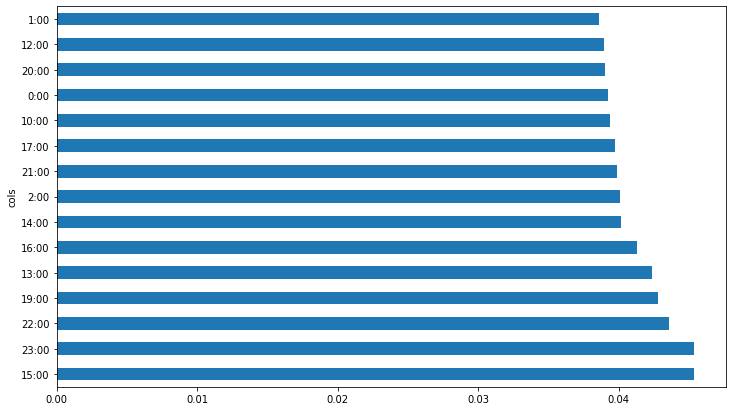

In [26]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:15]);